### Master of Applied Artificial Intelligence

**Course: TC4033 - Computational Vision for Images and Video**

<img src="./../assets/logo.png" alt="Image Alt Text" width="500"/>

**Harris Edge & Corner Detection**

Tutor: Dr. Gilberto Ochoa


Team members:
* Alfonso de Lucas Espinosa - A01795118
* Ignacio Jose Aguilar Garcia - A00819762
* Alejandro Calderon Aguilar - A01795353
* Ricardo Mar Cupido - A01795394
* Mario Fonseca Martinez - A01795228

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [39]:
import cv2
import matplotlib.pyplot as plt
from scipy import signal as sig
import numpy as np
from scipy.ndimage.filters import convolve

/var/folders/f4/_7gcrdbs0wgfd1vwynlsz7800000gn/T/ipykernel_2674/1510717638.py:5: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve


In [40]:
def gradient_x(imggray):
    kernel_x = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]])
    return sig.convolve2d(imggray, kernel_x, mode='same')

def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1],
                         [0, 0, 0],
                         [-1, -2, -1]])
    return sig.convolve2d(imggray, kernel_y, mode='same')

def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g = np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

In [41]:
# Cell [2]: DEFINIR LAS RUTAS DE IMÁGENES
image_files = [
    "./data/cerdito_1.jpeg",
    "./data/cerdito_2.jpeg"
]

Procesando: ./data/cerdito_1.jpeg


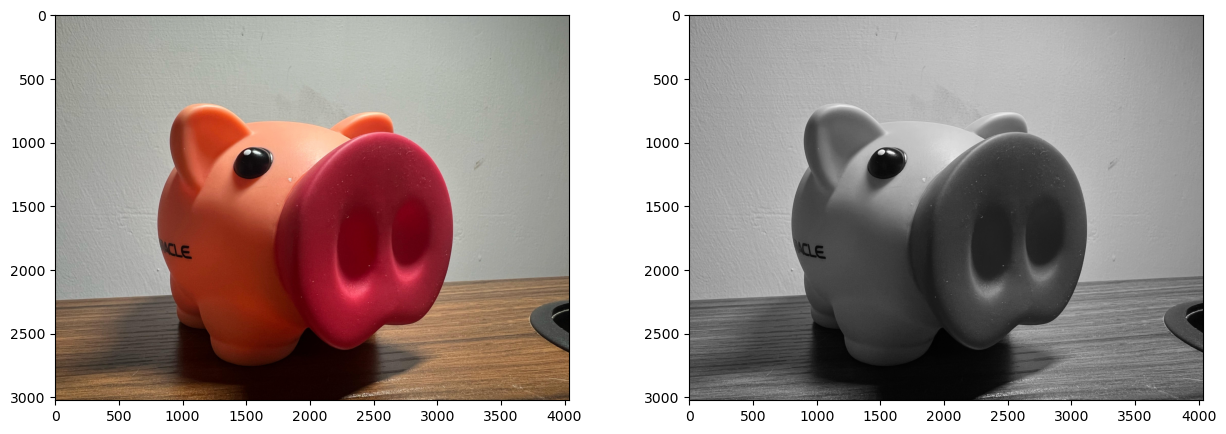

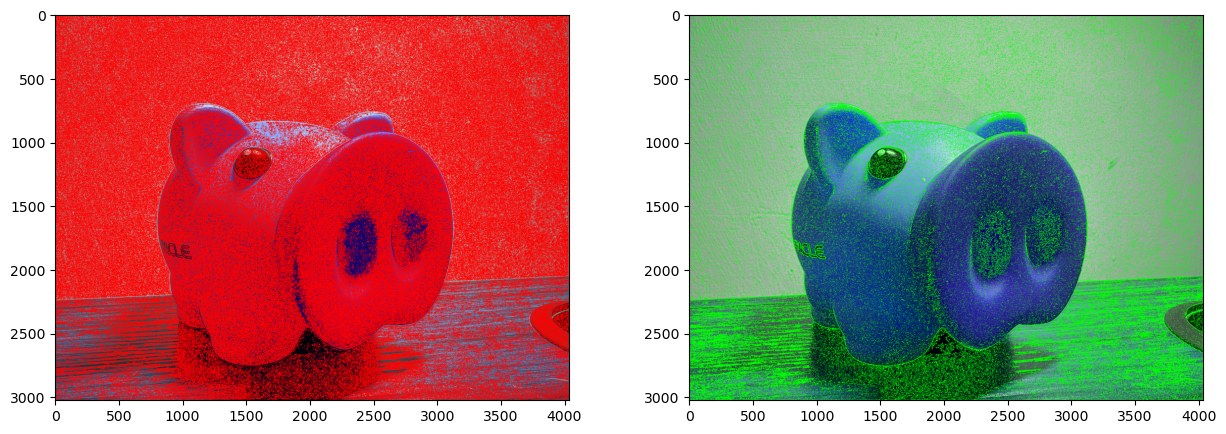

-----------
Procesando: ./data/cerdito_2.jpeg


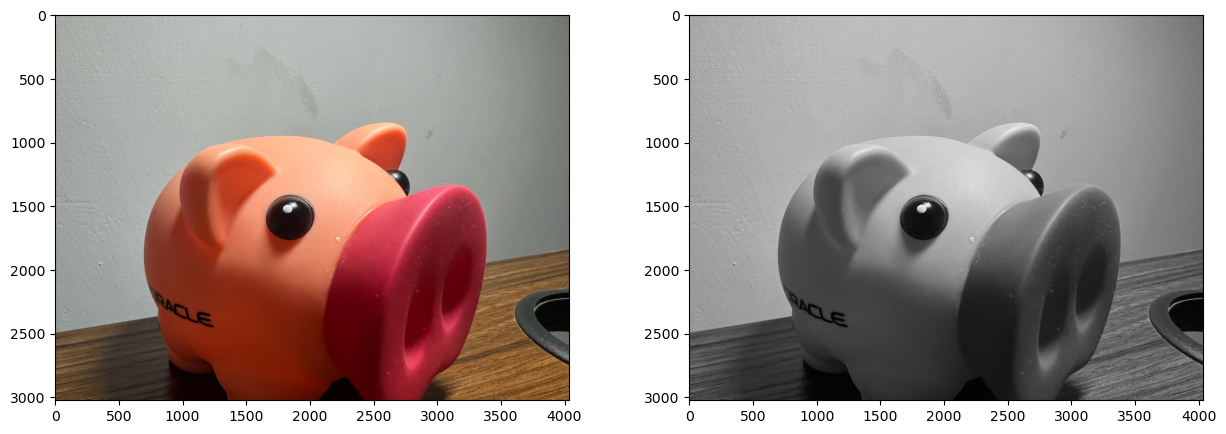

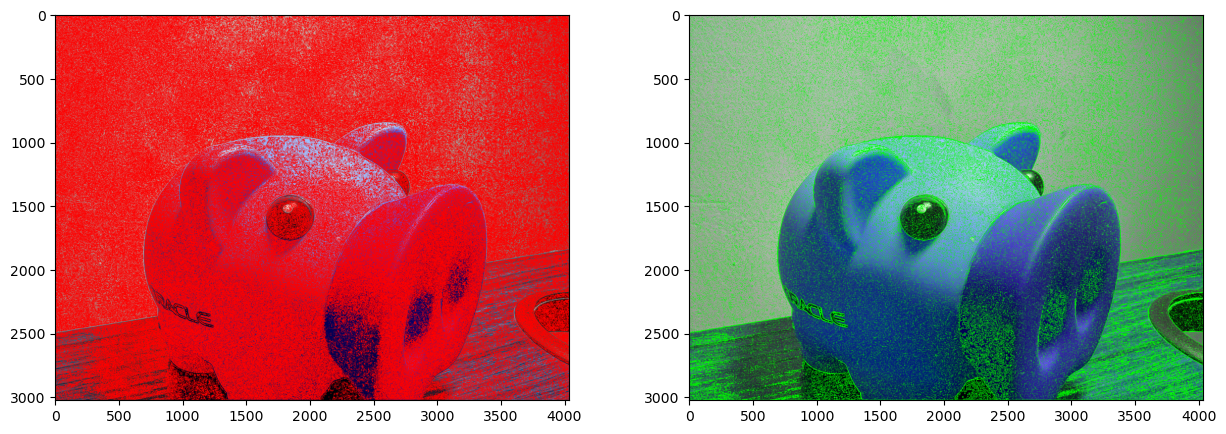

-----------


In [42]:
# Cell [3]: PROCESAR TODAS LAS IMÁGENES EN UN FOR
for file_path in image_files:
    print("Procesando:", file_path)
    
    # PASO #1
    img = cv2.imread(file_path)
    img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Muestra (opcional) en la misma celda
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_color)
    plt.subplot(1, 2, 2)
    plt.imshow(img_gray, cmap="gray")
    plt.show()
    
    # PASO #2
    I_x = gradient_x(img_gray)
    I_y = gradient_y(img_gray)
    # ... etc.

    # PASO #3
    Ixx = convolve(I_x**2, gaussian_kernel(3, 1))
    Ixy = convolve(I_y*I_x, gaussian_kernel(3, 1))
    Iyy = convolve(I_y**2, gaussian_kernel(3, 1))
    
    # PASO #4
    k = 0.05
    detA = Ixx * Iyy - (Ixy ** 2)
    traceA = Ixx + Iyy
    harris_response = detA - k * (traceA ** 2)
    
    # PASO #5
    img_copy_for_corners = np.copy(img)
    img_copy_for_edges = np.copy(img)

    for rowindex, response in enumerate(harris_response):
        for colindex, val in enumerate(response):
            if val > 0:
                img_copy_for_corners[rowindex, colindex] = [255, 0, 0]
            elif val < 0:
                img_copy_for_edges[rowindex, colindex] = [0, 255, 0]

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_copy_for_corners, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.imshow(img_copy_for_edges, cmap='gray')
    plt.show()
    
    print("-----------")